In [25]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
dataset = pd.read_excel('Dataset/changed/Malaysian-All.xlsx')
dataset.describe()

,PIN,Age,Sex,Nationality,Ethinicity,HL,HW,FL,FW,NL,NW,CI,NI,FI
count,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,178.055556,20.984127,1.484127,2.0,2.000000,17.694365,14.460119,10.756746,14.069048,4.495159,3.148333,81.819140,70.908726,76.586453
std,81.352301,1.629646,0.501743,0.0,0.819756,0.886278,0.816185,0.851994,0.879860,0.611032,0.346592,4.592707,9.791200,5.863230
min,2.000000,18.000000,1.000000,2.0,1.000000,15.350000,12.600000,9.000000,11.150000,3.150000,2.300000,72.074468,46.601942,65.986395
25%,115.250000,20.000000,1.000000,2.0,1.000000,17.012500,13.812500,10.250000,13.450000,4.100000,2.907500,78.660895,63.889154,73.230392
50%,199.500000,21.000000,1.000000,2.0,2.000000,17.775000,14.450000,10.700000,14.050000,4.450000,3.150000,81.021990,70.710784,75.597520
75%,248.750000,22.000000,2.000000,2.0,3.000000,18.200000,15.087500,11.287500,14.750000,4.750000,3.400000,84.759142,76.858974,79.354503
max,283.000000,26.000000,2.000000,2.0,3.000000,19.950000,16.550000,13.800000,16.750000,6.500000,4.050000,99.348534,95.238095,98.206278


In [48]:
xs = dataset.drop(['PIN','Nationality','HL','HW','FL','FW','NL','NW'],axis=1)
ys = dataset['Sex']
CI = dataset['CI']
NI = dataset['NI']
FI = dataset['FI']

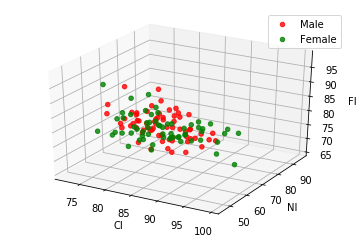

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# data = (xs[dataset['Sex']==1],xs[dataset['Sex']==2])
# colors = ("red", "green")
# groups = ("Male", "Female") 

# for data, color, group in zip(data, colors, groups):
# #     x, y, z = data
#     ax.scatter(CI,NI,FI, alpha=0.8, c=color, edgecolors='none', s=30, label=ys)

M_indian = xs[ys==1]
M_srilankan= xs[ys==2]

plotaxesindian = [M_indian['CI'],M_indian['NI'],M_indian['FI']]
plotaxessrilankan = [M_srilankan['CI'],M_srilankan['NI'],M_srilankan['FI']]


ax.scatter(plotaxesindian[0],plotaxesindian[1],plotaxesindian[2],alpha=0.8,c = 'r',label="Male")
ax.scatter(plotaxessrilankan[0],plotaxessrilankan[1],plotaxessrilankan[2],alpha=0.8,c = 'g',label="Female")
# ax.scatter(plotaxesmalay[0],plotaxesmalay[1],plotaxesmalay[2],alpha=0.8,c = 'b',label="Malaysian Malay")

ax.set_xlabel('CI')
ax.set_ylabel('NI')
ax.set_zlabel('FI')
ax.legend()
ax.text2D(0.05, 0.95, "", transform=ax.transAxes)
plt.legend(loc=1)
plt.show()

# Model Training

8007.00034108433


array([[33.75046298, 16.87036469],
       [19.47454169, 24.58608387],
       [15.07130849,  4.38653246],
       [22.00753274,  7.89416818],
       [15.66785701, 12.06840844],
       [13.30005159, 10.24714477],
       [12.64941709,  8.44724327],
       [14.45491908, 11.88788873],
       [16.91536034,  8.1372988 ],
       [11.99673346, 12.19368172],
       [17.8537518 ,  6.61414661],
       [ 6.64394388, 15.68106521],
       [12.75023673,  9.48559955],
       [15.52256665,  9.31893885],
       [15.60458079,  5.80668691],
       [ 9.45229393, 13.83531327],
       [ 8.65850705, 25.22142475],
       [ 7.59443974, 21.86868671],
       [27.35458175, 12.70695917],
       [10.60325377, 27.6447892 ],
       [13.0624092 ,  7.98344254],
       [ 8.89987293, 20.47280539],
       [ 6.59652228, 12.28166533],
       [ 9.02012572, 13.19375742],
       [17.60916598,  4.0131455 ],
       [ 6.5670475 , 14.37233163],
       [15.80712636,  3.81111754],
       [12.44658652,  7.26922318],
       [13.24336021,

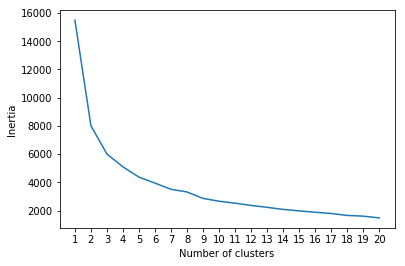

In [50]:
# Import KMeans
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#train test split
x_train,x_test,y_train,y_test = train_test_split(xs,ys,test_size = 0.25,random_state=42)

N = np.linspace(1,20,20,dtype=int)
n_inertia=[]
for n in range(1,21):
    # Create a KMeans instance with 3 clusters: model
    model = KMeans(n_clusters=n)

    # Fit model to points
    model.fit_transform(x_train)
    n_inertia.append(model.inertia_)
    
# Determine the cluster labels of new_points: labels
labels = model.predict(x_test)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(N)
plt.plot(N,n_inertia)
print(n_inertia[1])
model = KMeans(n_clusters=2)
model.fit_transform(x_train)

In [54]:
predicted = np.empty([labels.shape[0]],dtype=str)
actual = np.empty([y_test.shape[0]],dtype=str)

labels = model.predict(xs)
# predicted[labels==0] = "Indian"
# predicted[labels==1] = "Srilankan"
# # predicted = predicted.reshape((-1,1))
# actual[y_test==1] = "Indian"
# actual[y_test==5] = "Srilankan"
# actual = actual.reshape((-1,1))



# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'predicted': labels, 'actual': ys})

# Create crosstab: ct
ct = pd.crosstab(df['actual'],df['predicted'])

# Display ct
new_df = dataset
new_df['prediction'] = labels
new_df=new_df.drop(['Nationality','Sex','HL','HW','FL','FW','NL','NW'],axis=1)
# new_df.loc[new_df.prediction == 0, 'prediction'] = "Male"
# new_df.loc[new_df.prediction == 1, 'prediction'] = "Female"
print(ct)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(new_df)

predicted   0   1
actual           
1          22  43
2          24  37
     PIN  Age  Ethinicity         CI         NI         FI  prediction
0      3   20           1  79.586563  62.601626  83.061889           0
1     11   20           1  85.175202  60.162602  90.491803           0
2     32   19           1  84.139785  55.384615  88.141026           0
3     34   19           1  76.021798  57.142857  87.162162           0
4    114   21           1  79.941349  76.388889  69.039146           1
5    122   21           1  78.258575  69.662921  73.870968           1
6    123   20           1  78.740157  80.487805  75.895765           1
7    132   21           1  84.078212  77.922078  65.986395           1
8    173   21           1  82.764228  84.745763  71.612903           1
9    182   21           1  87.464387  68.539326  74.394464           1
10   183   19           1  83.701657  67.833698  78.378378           0
11   188   21           1  79.373368  85.393258  75.000000           1
12   

In [52]:
ci_center = model.cluster_centers_[:,3]
ni_center = model.cluster_centers_[:,4]
fi_center = model.cluster_centers_[:,5]

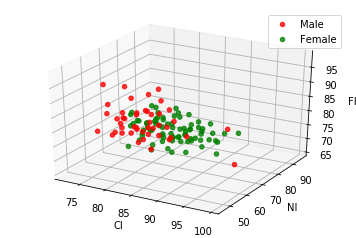

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# data = (xs[dataset['Sex']==1],xs[dataset['Sex']==2])
# colors = ("red", "green")
# groups = ("Male", "Female") 

# for data, color, group in zip(data, colors, groups):
# #     x, y, z = data
#     ax.scatter(CI,NI,FI, alpha=0.8, c=color, edgecolors='none', s=30, label=ys)

M_indian = xs[labels==0]
M_srilankan= xs[labels==1]

plotaxesindian = [M_indian['CI'],M_indian['NI'],M_indian['FI']]
plotaxessrilankan = [M_srilankan['CI'],M_srilankan['NI'],M_srilankan['FI']]


ax.scatter(plotaxesindian[0],plotaxesindian[1],plotaxesindian[2],alpha=0.8,c = 'r',label="Male")
ax.scatter(plotaxessrilankan[0],plotaxessrilankan[1],plotaxessrilankan[2],alpha=0.8,c = 'g',label="Female")
# ax.scatter(ci_center[0],ni_center[0],fi_center[0],c = 'b',marker='d',s=100)
# ax.scatter(ci_center[1],ni_center[1],fi_center[1],c = 'y',marker='d',s=100)

ax.set_xlabel('CI')
ax.set_ylabel('NI')
ax.set_zlabel('FI')
ax.legend()
ax.text2D(0.05, 0.95, "", transform=ax.transAxes)
plt.legend(loc=1)
plt.show()